# TWINKLE Tutorial Jupyter Notebook

# 1. Set up

In [1]:
pwd

'/Users/darthpatel/Library/CloudStorage/Dropbox/Research/twinkle-master'

In [2]:
import json, os
import numpy as np
import matplotlib.pyplot as plt
from twinkle import twinkle
import pandas as pd

os.environ["MKL_DEBUG_CPU_TYPE"] = "5"  # Suppresses SSE4.2 deprecation warning

%load_ext autoreload
%autoreload 2

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


#### INITIATE INTERACTIVE MATPLOTLIB PLOTTING

##### If this doesn't work, change to "%matplotlib inline" and update both matplotlib and jupyter notebook to make nbagg backend to work

In [3]:
%matplotlib inline

## 1.1 Load & View Parameter and User Input Files
##### Change path to where you store your paramfile

In [4]:
jfile = os.path.join(os.path.expanduser('~'),'Dropbox','Research','twinkle-master','sed_paramfile.json')

Provide the "fuel" for the stars to twinkle. ;-) 

In [5]:
twinkle.Fuel(jfile)

Empirical Color File: /Users/darthpatel/Library/CloudStorage/Dropbox/Research/twinkle-master/Inputs_and_Models/EMamajek_MSColors.txt
Input User File: /Users/darthpatel/Library/CloudStorage/Dropbox/Research/twinkle-master/Inputs_and_Models/StellarInputFiles/sample_stardata_simple.txt
---------
      Loading All Gridmodels   
Loaded ATLAS9 of g=40, met=0
Loaded NextGen of g=40, met=0
       Done Loading Models     
---------


In [6]:
twinkle.DataStuff.show_parameterfile(indent=2)

{
  "comments": {
    "stinfo_file": "File that contains all information for input stars.",
    "stinfo_topdir": "Directory name that holds all the stellar information",
    "stcolor_dir": "Directory name that holds empirical relation information",
    "input_stars": "filename of stars in single column ascii format.",
    "bv_colorfile": "filename of empirical B and V colors & things.",
    "write2file": "boolean that determines whether to write out results to file",
    "write_sed": "boolean that determines whether to write out SED to file.",
    "longwave_Bool": "boolean that determines whether to plot longer than 30um data",
    "W3Adapt": "boolean that determines whether to use W3 to fit photopshere.",
    "W2Adapt": "boolean that deteremines whether to use W2 to fit photosphere.",
    "wave_min": "min wavelength in angstroms to calculate SED.",
    "wave_max": "max wavelength in angstroms to calculate SED.",
    "gridpts": "SED resolution.",
    "mags2use0_original": "Array of str

In [7]:
twinkle.DataStuff.print_input_file()

  MainName OtherName  spt sptViz SPT2HIP  NoOptical    model  temp  grav  met  \
0    Star1  Star_ID2  A2V    A2V       A      False  NextGen  5000    40    0   
1    Star2  Star_ID2  A2V    A2V       A      False   ATLAS9  5000    40    0   
2    Star3  Star_ID2  A2V    A2V       A       True  NextGen  5000    40    0   

   ... w3mC  w3meC  W4m   W4me  HPACS160_flux  HPACS160_fluxe  HPACS100_flux  \
0  ...  4.7  0.014  4.4  0.026            0.4          0.0503            0.8   
1  ...  4.7  0.014  4.4  0.026            0.4          0.0503            0.8   
2  ...  4.7  0.014  4.4  0.026            0.4          0.0503            0.8   

   HPACS100_fluxe  Akari90_flux  Akari90_fluxe  
0           0.011           1.2           0.14  
1           0.011           1.2           0.14  
2           0.011           1.2           0.14  

[3 rows x 47 columns]


* You can access the parameterfile data through the "DataStuff" global parameter in `twinkle`. 
* You'll see that `twinkle.DataStuff` is just an instatntiation of `sed.DataLogistics` class

In [8]:
specs = twinkle.DataStuff.specs

# All the bands you can use in the simulation. 
print(specs['phot']['mags2use0_original'])

# All the bands that you've set to use to scale the raw model spectrum to the observed data
print(specs['phot']['mags4scale0_original'])

# All the bands that you've set to fit the scaled stellar model to the observed data
print(specs['phot']['mags4Phot0_original'])

['BJ', 'VJ', 'J2M', 'H2M', 'Ks2M', 'W1', 'W2', 'W3', 'W4', 'HPACS100_flux', 'HPACS160_flux']
['BJ', 'VJ', 'J2M', 'H2M', 'Ks2M']
['BJ', 'VJ', 'J2M', 'H2M', 'Ks2M', 'W1', 'W2']


Remember, that `mags2use0_original` is the set of bands that can be used. All the other lists must be SUB-SETS of `mags2use0_original`

Note the different star names and the various options.

## 2. Fit Photosphere

### 2.1 Select a Star and Fit it

In [9]:
# select a name in the user input file
sname = 'Star1'
star1 = twinkle.Star(starname=sname)

Error: The key 'HPACS100_fluxm' was not found in the mags2use0 list.
HPACS100 was converted to magnitude
Error: The key 'HPACS160_fluxm' was not found in the mags2use0 list.
HPACS160 was converted to magnitude
Bands used to fit photosphere: BJ, H2M, J2M, Ks2M, VJ, W1, W2
Bands used to scale photosphere: BJ, H2M, J2M, Ks2M, VJ
chi2 = 5.78
Fitted Stellar Radius: 2.253 +/- 0.014 Rsun
Fitted Stellar Temperature: 8924 +/- 46 K


/Users/darthpatel/Library/CloudStorage/Dropbox/Research/twinkle-master/twinkle/sed.py:754: RuntimeWarning: divide by zero encountered in log10
  lam_arr_all, flux_arr_all = np.log10(lam_arr_all), np.log10(


#### AND THAT'S IT FOLKS! Your SED is lit!

In the output you'll see which bands were used for the photospheric model fits, the associated chi2 value, and the optimal values for the stellar radius and temperature from the fit


### 2.2 Accessing Results

Once a `twinkle` object has been instantiated, you can access various information for that star, and the functions in both `twinkle.py` and `sed.py`.

In [10]:
print(f'Star: {star1.starname}')
print(f'distance: {star1.disti:.2f} parsecs')
print(f'Stellar Temperature: {star1.StarTemp:.0f} K')
print(f'Model used: {star1.modeli}')

Star: Star1
distance: 64.10 parsecs
Stellar Temperature: 8924 K
Model used: NextGen


#### Bands used in the simulation

In [11]:
# All the bands included in the simulation.
# fluxes are also calculated for each of these
print(star1.mags2use)

['BJ', 'H2M', 'HPACS100', 'HPACS160', 'J2M', 'Ks2M', 'VJ', 'W1', 'W2', 'W3', 'W4']


#### Corresponding Fluxes + Uncertainties [ergs/s/cm^2/Angstroms]

In [12]:
star1.flux, star1.fluxerr

({'BJ_flux': 5.1212971335637296e-11,
  'H2M_flux': 1.0750530851825985e-12,
  'HPACS100_flux': 2.3983396640000002e-17,
  'HPACS160_flux': 4.68425715625e-18,
  'J2M_flux': 2.8933805862527e-12,
  'Ks2M_flux': 4.585092212968288e-13,
  'VJ_flux': 3.138094836286787e-11,
  'W1_flux': 8.725298668883382e-14,
  'W2_flux': 2.5546889098617642e-14,
  'W3_flux': 8.588574477368846e-16,
  'W4_flux': 8.84557999841719e-17},
 {'BJ_flux': 4.704604308969306e-13,
  'H2M_flux': 1.7822888698454704e-14,
  'HPACS100_flux': 3.297717037999999e-19,
  'HPACS160_flux': 5.890453373984374e-19,
  'J2M_flux': 5.3298040050110726e-14,
  'Ks2M_flux': 8.868354582850445e-15,
  'VJ_flux': 2.8682389379933944e-13,
  'W1_flux': 6.204880088063845e-15,
  'W2_flux': 9.56727423352346e-16,
  'W3_flux': 1.1074517194528836e-17,
  'W4_flux': 2.1182408668971385e-18})

# 3. Plot Results

You can either plot the data with the built in `twinkle.plot_photosphere` and `twinkle.plot_observedData` functions, or access the global data, and plot them however you wish.

In [13]:
import matplotlib.ticker as mtick

xlabel = twinkle.x_wav_label_microns
ylabel = twinkle.y_flux_label

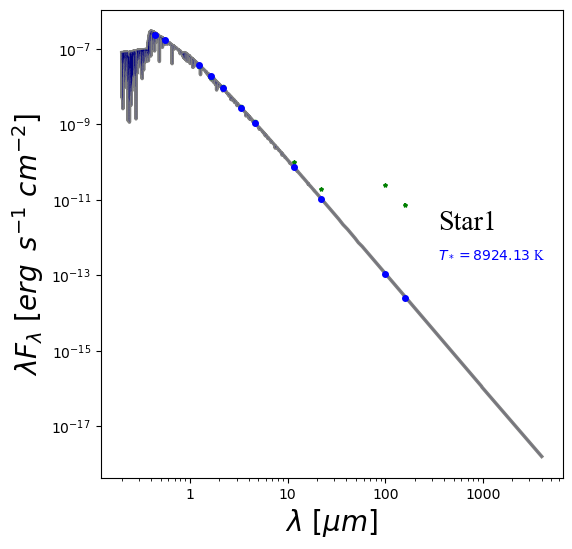

In [14]:
# SET UP AXIS
ax = plt.figure(figsize=(6,6)).add_subplot(111)

# PLOT PHOTOSPHERIC AND LITERATURE DATA
star1.plot_photosphere(ax, pointsize=4,lcolor='blue',pcolor='blue',lw=.1,label='Model Convolved')
star1.plot_observedData(ax, ms=3,lw=2.5,label='Observed',alpha=0.5)

# ADDITIONAL PLOT STUFF
plt.loglog()
#ax.set_xlim(.2,100)
#ax.set_ylim(1e-13,1e-6)

ax.set_xlabel(xlabel, fontsize=20, family='sans-serif')
ax.set_ylabel(ylabel,fontsize=20, family='sans-serif')

plt.subplots_adjust(left=.19, right=.96, bottom=.15, top=.93)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))


ax.annotate(f'{star1.starname}', xy=(0.73, 0.53), xycoords='axes fraction',
            fontsize=20, family='Times New Roman')

ax.annotate(r'$T_* = {:.2f}$ K'.format(star1.StarTemp), xy=(0.73, 0.47),
            xycoords='axes fraction',fontsize=10, family='Times New Roman', color='blue')
# plt.legend()

plt.show()

## 4. Different Scenarios

### 4.1 Same Star - Different Atmosphere Model

Star1 and Star2 are the exact same lines in the input user file, but one uses the NextGen model, while the other uses ATLAS9. Here, you can see what they look like side by side.

In [15]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [16]:
# this line will be changed once pandas dataframe is integrated into the structure of the code
df_user = pd.DataFrame(twinkle.sed.StarsDat)
df_user

,MainName,OtherName,spt,sptViz,SPT2HIP,NoOptical,model,temp,grav,met,Otype,plx,e_Plx,BV,e_BV,BTVT,e_BTVT,BJm,BJme,VJm,VJme,Vtmag,eVtmag,Btmag,eBtmag,J2Mm,J2Mme,H2Mm,H2Mme,Ks2Mm,Ks2Mme,W1m,W1me,W2m,W2me,W3m,W3me,w3mC,w3meC,W4m,W4me,HPACS160_flux,HPACS160_fluxe,HPACS100_flux,HPACS100_fluxe,Akari90_flux,Akari90_fluxe
0,Star1,Star_ID2,A2V,A2V,A,False,NextGen,5000,40,0,Star,15.6,0.25,0.072,0.001,0.086,0.016643,5.242,0.009974,5.17,0.009924,5.175,0.009,5.261,0.014,5.085,0.02,5.057,0.018,4.926,0.021,4.92976,0.077211,4.938948,0.040661,4.7,0.014,4.7,0.014,4.4,0.026,0.4,0.0503,0.8,0.011,1.2,0.14
1,Star2,Star_ID2,A2V,A2V,A,False,ATLAS9,5000,40,0,Star,15.6,0.25,0.072,0.001,0.086,0.016643,5.242,0.009974,5.17,0.009924,5.175,0.009,5.261,0.014,5.085,0.02,5.057,0.018,4.926,0.021,4.92976,0.077211,4.938948,0.040661,4.7,0.014,4.7,0.014,4.4,0.026,0.4,0.0503,0.8,0.011,1.2,0.14
2,Star3,Star_ID2,A2V,A2V,A,True,NextGen,5000,40,0,Star,15.6,0.25,0.072,0.001,0.086,0.016643,5.242,0.009974,5.17,0.009924,5.175,0.009,5.261,0.014,5.085,0.02,5.057,0.018,4.926,0.021,4.92976,0.077211,4.938948,0.040661,4.7,0.014,4.7,0.014,4.4,0.026,0.4,0.0503,0.8,0.011,1.2,0.14


In [17]:
star2 = twinkle.Star(starname='Star2')

Error: The key 'HPACS100_fluxm' was not found in the mags2use0 list.
HPACS100 was converted to magnitude
Error: The key 'HPACS160_fluxm' was not found in the mags2use0 list.
HPACS160 was converted to magnitude
Bands used to fit photosphere: BJ, H2M, J2M, Ks2M, VJ, W1, W2
Bands used to scale photosphere: BJ, H2M, J2M, Ks2M, VJ
chi2 = 6.09
Fitted Stellar Radius: 2.345 +/- 0.015 Rsun
Fitted Stellar Temperature: 8738 +/- 46 K


/Users/darthpatel/Library/CloudStorage/Dropbox/Research/twinkle-master/twinkle/sed.py:754: RuntimeWarning: divide by zero encountered in log10
  lam_arr_all, flux_arr_all = np.log10(lam_arr_all), np.log10(


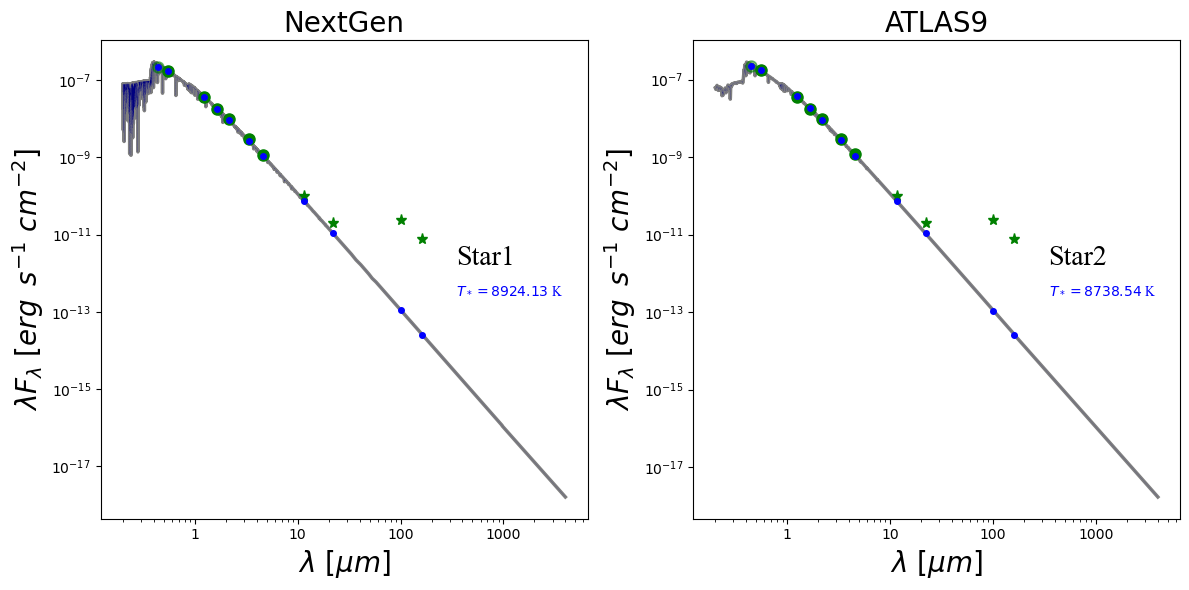

In [18]:
# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs[0], axs[1]

# ========================================================================================================
# PLOT FOR STAR 1

# PLOT PHOTOSPHERIC AND LITERATURE DATA
star1.plot_photosphere(ax1, pointsize=4,lcolor='blue',pcolor='blue',lw=.1,label='Model Convolved')
star1.plot_observedData(ax1, ms=8,lw=2.5,label='Observed',alpha=0.5)
model = star1.modeli
ax1.set_title(f'{model}',fontsize=20)
# ADDITIONAL PLOT STUFF
ax1.loglog()

ax1.set_xlabel(xlabel, fontsize=20, family='sans-serif')
ax1.set_ylabel(ylabel,fontsize=20, family='sans-serif')


ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))


ax1.annotate(f'{star1.starname}', xy=(0.73, 0.53), xycoords='axes fraction',
            fontsize=20, family='Times New Roman')

ax1.annotate(r'$T_* = {:.2f}$ K'.format(star1.StarTemp), xy=(0.73, 0.47),
            xycoords='axes fraction',fontsize=10, family='Times New Roman', color='blue')
# ========================================================================================================
# PLOT FOR STAR 2
star2.plot_photosphere(ax2, pointsize=4,lcolor='blue',pcolor='blue',lw=.1,label='Model Convolved')
star2.plot_observedData(ax2, ms=8,lw=2.5,label='Observed',alpha=0.5)
model = star2.modeli
ax2.set_title(f'{model}',fontsize=20)
# ADDITIONAL PLOT STUFF
ax2.loglog()

ax2.set_xlabel(xlabel, fontsize=20, family='sans-serif')
ax2.set_ylabel(ylabel,fontsize=20, family='sans-serif')
ax2.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax2.annotate(f'{star2.starname}', xy=(0.73, 0.53), xycoords='axes fraction',
            fontsize=20, family='Times New Roman')

ax2.annotate(r'$T_* = {:.2f}$ K'.format(star2.StarTemp), xy=(0.73, 0.47),
            xycoords='axes fraction',fontsize=10, family='Times New Roman', color='blue')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

### 4.2 NoOptical Flag

Star 3 is the same as Star 2, except that it's `NoOptical` flag is set to `True`. This flag determines whether to use the optical data (B, V) data for the photospheric fit or not, even if you've included it in your photometry use lists

In [19]:
star3 = twinkle.Star(starname='Star3')

Error: The key 'HPACS100_fluxm' was not found in the mags2use0 list.
HPACS100 was converted to magnitude
Error: The key 'HPACS160_fluxm' was not found in the mags2use0 list.
HPACS160 was converted to magnitude
Bands used to fit photosphere: BJ, H2M, J2M, Ks2M, VJ, W1, W2
Bands used to scale photosphere: BJ, H2M, J2M, Ks2M, VJ
chi2 = 5.78
Fitted Stellar Radius: 2.253 +/- 0.014 Rsun
Fitted Stellar Temperature: 8924 +/- 46 K


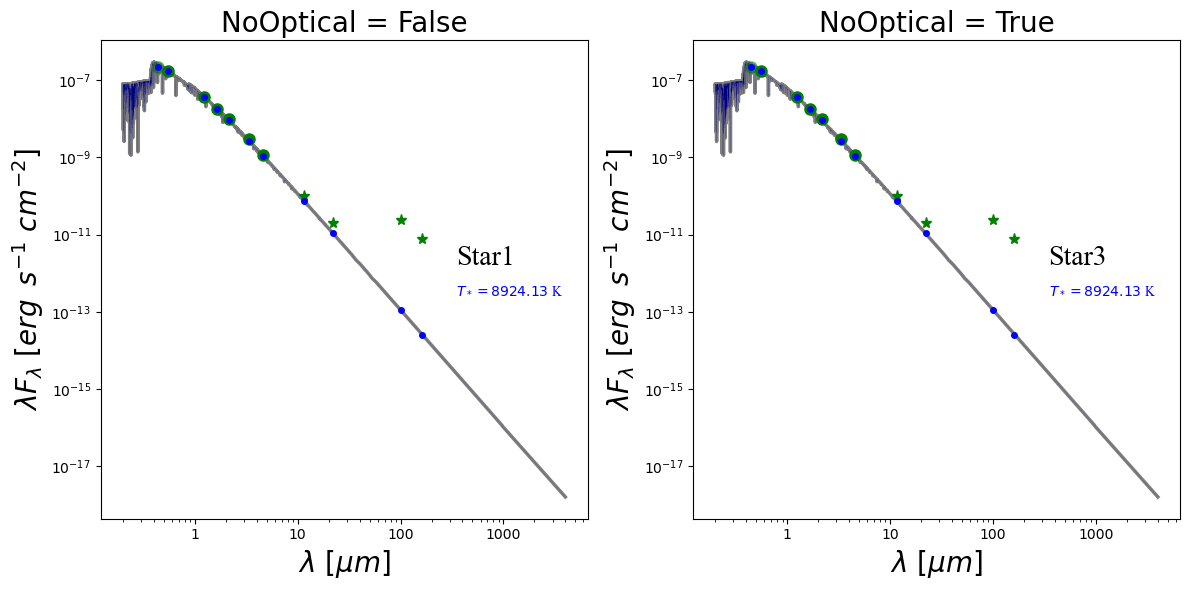

In [20]:
# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs[0], axs[1]

# ========================================================================================================
# PLOT FOR STAR 1

# PLOT PHOTOSPHERIC AND LITERATURE DATA
star1.plot_photosphere(ax1, pointsize=4,lcolor='blue',pcolor='blue',lw=.1,label='Model Convolved')
star1.plot_observedData(ax1, ms=8,lw=2.5,label='Observed',alpha=0.5)
ax1.set_title('NoOptical = False',fontsize=20)
# ADDITIONAL PLOT STUFF
ax1.loglog()

ax1.set_xlabel(xlabel, fontsize=20, family='sans-serif')
ax1.set_ylabel(ylabel,fontsize=20, family='sans-serif')


ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))


ax1.annotate(f'{star1.starname}', xy=(0.73, 0.53), xycoords='axes fraction',
            fontsize=20, family='Times New Roman')

ax1.annotate(r'$T_* = {:.2f}$ K'.format(star1.StarTemp), xy=(0.73, 0.47),
            xycoords='axes fraction',fontsize=10, family='Times New Roman', color='blue')
# ========================================================================================================
# PLOT FOR STAR 2
star3.plot_photosphere(ax2, pointsize=4,lcolor='blue',pcolor='blue',lw=.1,label='Model Convolved')
star3.plot_observedData(ax2, ms=8,lw=2.5,label='Observed',alpha=0.5)
ax2.set_title('NoOptical = True',fontsize=20)
# ADDITIONAL PLOT STUFF
ax2.loglog()

ax2.set_xlabel(xlabel, fontsize=20, family='sans-serif')
ax2.set_ylabel(ylabel,fontsize=20, family='sans-serif')
ax2.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax2.annotate(f'{star3.starname}', xy=(0.73, 0.53), xycoords='axes fraction',
            fontsize=20, family='Times New Roman')

ax2.annotate(r'$T_* = {:.2f}$ K'.format(star3.StarTemp), xy=(0.73, 0.47),
            xycoords='axes fraction',fontsize=10, family='Times New Roman', color='blue')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

# 5. Calculate Excess Flux

`Twinkle` was originally created to calculate the excess infrared (IR) flux for characterizing dust around other stars, which are like beacons for planets in that system. So `Twinkle` has some tools to do this relatively quickly.

In [21]:
# There's a function that will calculate the excess flux at bands listed in mags4Dust
star1.calc_excessflux()

('HPACS100', ' excess flux ', 2.387464949655808e-17, 'erg/s/cm2/ang')
('HPACS160', ' excess flux ', 4.668172063230565e-18, 'erg/s/cm2/ang')
('W3', ' excess flux ', 2.1442465576124337e-16, 'erg/s/cm2/ang')
('W4', ' excess flux ', 3.9793071415061074e-17, 'erg/s/cm2/ang')


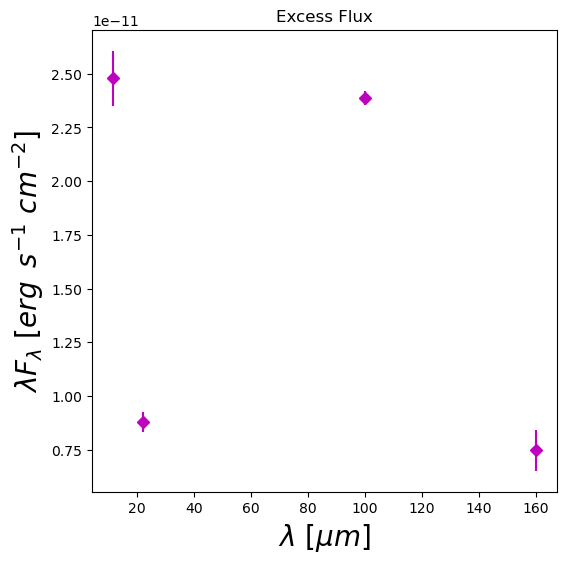

In [22]:
# SET UP AXIS
waveEx = star1.waveEx
exFlux = star1.fluxEx
exFlux_e = star1.efluxEx

ax3 = plt.figure(figsize=(6,6)).add_subplot(111)
ax3.set_title('Excess Flux')
ax3.errorbar(waveEx * twinkle._ANG2MICRON, waveEx * exFlux,
             yerr=waveEx * exFlux_e, fmt='mD',ms=6)
ax3.set_ylabel(ylabel,fontsize=20, family='sans-serif')
ax3.set_xlabel(xlabel, fontsize=20, family='sans-serif')
ax3.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.show()

# 6. FIT ONE TO TWO BLACKBODIES

## 6.1 Try fitting 1 blackbody first

In [25]:
# RESET FULL SPECTRUM - bbdust_flux
star1.fullspectrum = star1.StarPhotosphere[1][:]

Access the SED Tools through twinkle object

In [27]:
stoo = twinkle.STools

In [30]:
# FOR NOW, USING OLD FITTING ROUTINES. WILL EVENTUALLY SWITCH TO PANDAS
# OR SCIPY
from twinkle.utils import mosaic_tools as mt
ft = mt.FittingTools()

# ==============================================
# INITIAL GUESS
tempdust = 100.
SEDx_ang = star1.StarPhotosphere[0][:]
bbdust = {}
# ==============================================
# CALCULATE BROADBAND PHOTOMETRY ACROSS IR EXCESS WAVELENGTHS
for i,band in enumerate(star1.mags4Dust):
    bbdust[band] = stoo.blackbody(SEDx_ang,np.array([tempdust]),1, np.array([band]))[0]

bbdust_flux = np.array(list(zip(*sorted(bbdust.items())))[1]).flatten()

FluxNorm_dust = np.average(exFlux / bbdust_flux, weights=1. / exFlux_e)

# INITIAL GUESS FOR DUST RADIUS
Rad_dust = np.sqrt(FluxNorm_dust / star1.su2ea_dust)
print('Initial guess for dust radius: {} AU'.format(Rad_dust))


Initial guess for dust radius: 12.12725414764653 AU


from scipy.optimize import curve_fit

p0_dust = np.array([tempdust, 30])
popt, pcov = curve_fit(stoo.blackbody, SEDx_ang, exFlux, p0=p0_dust, sigma=exFlux_e,**)

In [32]:
# FIT BLACKBODY
#p0_dust = np.array([tempdust, Rad_dust])
p0_dust = np.array([tempdust, Rad_dust])
nparams = len(p0_dust)
fa_Dust = {'x': SEDx_ang, 'y': exFlux, 'err': exFlux_e,
           'func': stoo.blackbody, 'su2ea1': star1.su2ea_dust, 'bands': star1 .mags4Dust,'bulk':True}

#parinfo_dust = [{'value': 0., 'step': 0, 'limits': [0, 0], 'limited': [0, 0], 'fixed': 0} for m in
#                range(nparams)]
parinfo_dust = [{'value': 0., 'step': 0, 'limits': [0, 0], 'limited': [0, 0], 'fixed': 0} for m in
                range(nparams)]

for k in range(nparams): parinfo_dust[k]['value'] = p0_dust[k]
parinfo_dust[0]['relstep'] = .2
parinfo_dust[1]['relstep'] = .2
parinfo_dust[0]['limited'] = [1,1]
parinfo_dust[0]['limits'] = [10,1000]

m_dust = mt.mpfit(ft.deviates_from_model, parinfo=parinfo_dust, functkw=fa_Dust);#,quiet=1)

# from scipy.optimize import curve_fit
# popt, pcov = 


### Print out Chi2 and dust temperatures

In [33]:
# CALCULATE SINGLE TEMP BLACKBODY FIT
p0_dust,errors = m_dust.params, m_dust.perror
chi2 = m_dust.fnorm/m_dust.dof
print('Chi2={:.2f}, T={:.1f} K , Radius = {:.1f} AU'.format(chi2,*p0_dust)) # , p0_dust, errors 
#p0_dust[0] = p0_dust[0] * 1.2
dust_flux = stoo.blackbody(SEDx_ang, p0_dust,star1.su2ea_dust)

Chi2=184.57, T=72.4 K , Radius = 17.2 AU


## 6.2 Plot New SEDs With Fitted Blackbody

In [34]:
# SAVE THE FULL SPECTRUM IN CASE YOU NEED TO RESET
fullspectrum_0 = star1.StarPhotosphere[1][:]

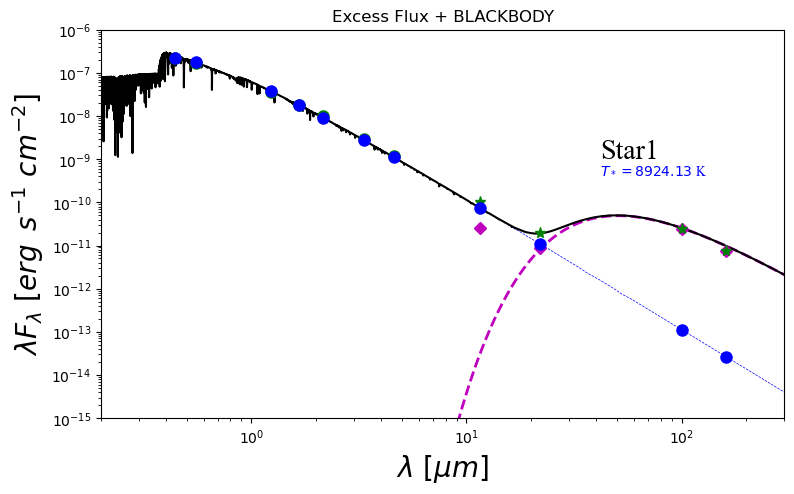

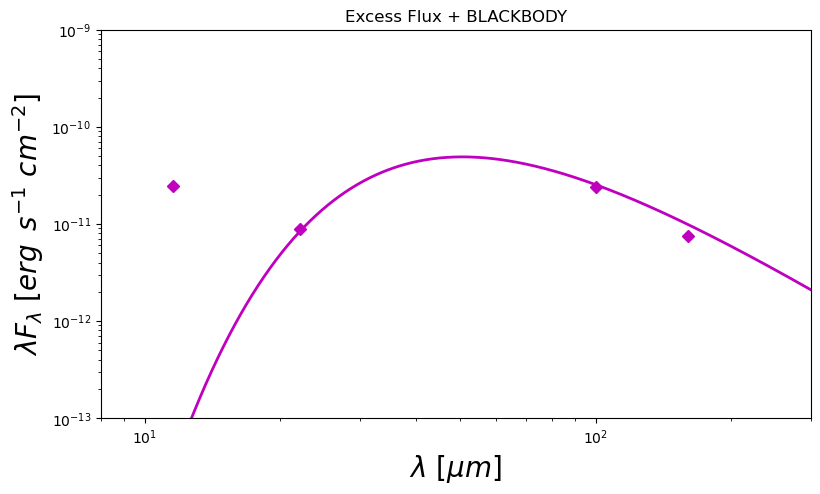

In [39]:
ax5 = plt.figure(figsize=(8,5)).add_subplot(111)

star1.plot_photosphere(ax5, pointsize=8,lcolor='blue',pcolor='blue',lw=0.5)

star1.fullspectrum = star1.StarPhotosphere[1] + dust_flux

plt.plot(SEDx_ang * twinkle._ANG2MICRON, dust_flux * SEDx_ang, 'm', ls='--',lw=2)

ax5.errorbar(waveEx * twinkle._ANG2MICRON, waveEx * exFlux, 
             yerr=waveEx * exFlux_e, fmt='mD',ms=6)
star1.plot_observedData(ax5,ms=8,lw=1.5)
ax5.set_title('Excess Flux + BLACKBODY')
ax5.set_xlim(.2,300)
ax5.set_ylim(1e-15,1e-6)
ax5.set_ylabel(ylabel,fontsize=20, family='sans-serif')
ax5.set_xlabel(xlabel, fontsize=20, family='sans-serif')
plt.tight_layout()
ax5.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax5.annotate(r'{}'.format(star1.starname), xy=(0.73, 0.67),xycoords='axes fraction',
            fontsize=20, family='Times New Roman')
ax5.annotate(r'$T_* = {:.2f}$ K'.format(star1.StarTemp), xy=(0.73, 0.63),
            xycoords='axes fraction',fontsize=10, family='Times New Roman', color='blue')
ax5.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.loglog()

# ===============================================================================================================
ax4 = plt.figure(figsize=(8,5)).add_subplot(111)
ax4.set_title('Excess Flux + BLACKBODY')
ax4.errorbar(waveEx * twinkle._ANG2MICRON, waveEx * exFlux,
             yerr=waveEx * exFlux_e, fmt='mD',ms=6)
ax4.plot(SEDx_ang * twinkle._ANG2MICRON, dust_flux * SEDx_ang,'m-',lw=2)
ax4.set_ylabel(ylabel,fontsize=20, family='sans-serif')
ax4.set_xlabel(xlabel, fontsize=20, family='sans-serif')
plt.tight_layout()
ax4.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax4.set_xlim(8,300)
ax4.set_ylim(1e-13,1e-9)

plt.loglog()
plt.show()

## 6.3 Fitting 2 blackbody's to excess flux

In [40]:
from importlib import reload

In [41]:
# FOR NOW, USING OLD FITTING ROUTINES. WILL EVENTUALLY SWITCH TO PANDAS
# OR SCIPY

# ==============================================
# INITIAL GUESS
td1, td2, td3 = 500, 100., 40
SEDx_ang = star1.StarPhotosphere[0]
bbdust = {}
# ==============================================
# CALCULATE BROADBAND PHOTOMETRY ACROSS IR EXCESS WAVELENGTHS
for band in star1.mags4Dust:
    bbdust[band] = stoo.NBlackBody(SEDx_ang,np.array([td1,1,td2,1,td3,1]),1, np.array([band]))[0]

bbdust_flux = np.array(list(zip(*sorted(bbdust.items())))[1]).flatten()
              
FluxNorm_dust = np.average(exFlux / bbdust_flux,
                           weights=1. / exFlux_e)

# INITIAL GUESS FOR DUST RADIUS
Rad_dust = np.sqrt(FluxNorm_dust / star1.su2ea_dust)
print(Rad_dust)

3.701636383940945


In [42]:
# FIT BLACKBODY
p0_dust = np.array([td1,Rad_dust,td2, Rad_dust*2,td3,Rad_dust**3])
nparams = len(p0_dust)
# fa_Dust = {'x': SEDx_ang, 'y': exFlux, 'err': exFlux_e,
#            'func': stoo.doubleBB, 'su2ea1': star1.su2ea_dust, 'bands': star1.mags4Dust,'bulk':True}
fa_Dust = {'x': SEDx_ang, 'y': exFlux, 'err': exFlux_e,
           'func': stoo.NBlackBody, 'su2ea1': star1.su2ea_dust, 'bands': star1.mags4Dust,'bulk':True}

parinfo_dust = [{'value': 0., 'relstep': 0, 'limits': [0, 0], 'limited': [0, 0], 'fixed': 0} 
                for m in range(nparams)]

for k in range(nparams): parinfo_dust[k]['value'] = p0_dust[k]
parinfo_dust[0]['relstep'] = 0.3
parinfo_dust[1]['relstep'] = 0.2
parinfo_dust[0]['limited'] = [1,1]
parinfo_dust[0]['limits'] = [200,1000]

parinfo_dust[2]['relstep'] = 0.3
parinfo_dust[3]['relstep'] = 0.2
parinfo_dust[2]['limited'] = [1,1]
parinfo_dust[2]['limits'] = [50,100]

parinfo_dust[4]['relstep'] = 0.3
parinfo_dust[5]['relstep'] = 0.2
parinfo_dust[4]['limited'] = [1,1]
parinfo_dust[4]['limits'] = [2,80]


m_dust = mt.mpfit(ft.deviates_from_model, parinfo=parinfo_dust, functkw=fa_Dust)#,quiet=1)


### Print out Chi2 and dust temperatures

In [43]:
# CALCULATE SINGLE TEMP BLACKBODY FIT
p0_dust,errors = m_dust.params, m_dust.perror
#chi2 = m_dust.fnorm/m_dust.dof
print('Chi2={:.2f}'.format(chi2))# , p0_dust, errors 
print(p0_dust)
dust_flux = stoo.NBlackBody(SEDx_ang, p0_dust,star1.su2ea_dust)

Chi2=184.57
[500.           3.70163638 100.           7.40327277  40.
  50.72023602]


## 6.2 Plot New SEDs With Fitted Blackbody

In [44]:
# RESET FULL SPECTRUM - 
star1.resetFullSpectrum()

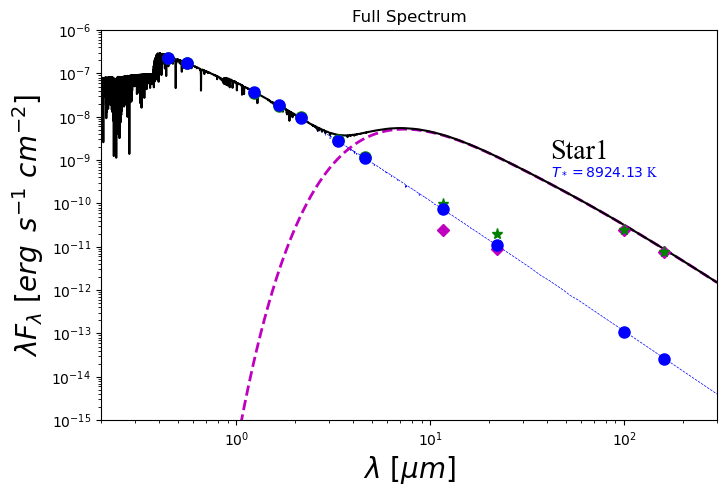

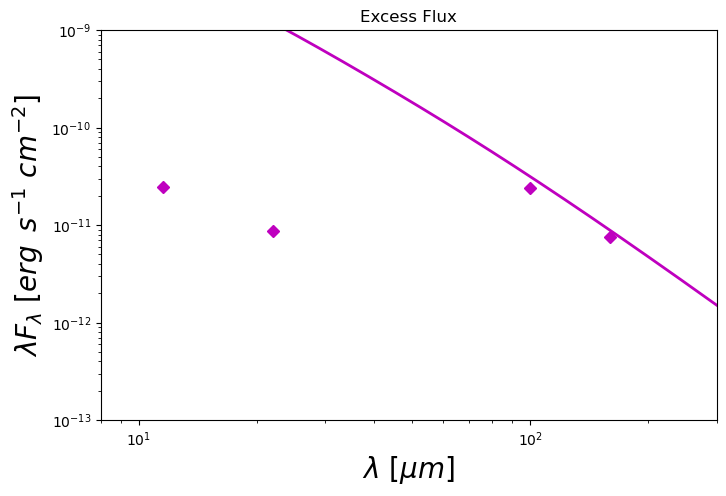

In [46]:
ax5 = plt.figure(figsize=(8,5)).add_subplot(111)
star1.plot_photosphere(ax5, pointsize=8,lcolor='blue',pcolor='blue',lw=0.5)
star1.fullspectrum = star1.StarPhotosphere[1] + dust_flux

plt.plot(SEDx_ang * twinkle._ANG2MICRON, dust_flux * SEDx_ang, 'm', ls='--',lw=2)
ax5.errorbar(waveEx * twinkle._ANG2MICRON, waveEx * exFlux, 
             yerr=waveEx * exFlux_e, fmt='mD',ms=6)
star1.plot_observedData(ax5,ms=8,lw=1.5)
ax5.set_title('Full Spectrum')
ax5.set_xlim(.2,300)
ax5.set_ylim(1e-15,1e-6)
ax5.set_ylabel(r'$\lambda F_{\lambda}\ [erg\,\ s^{-1}\ cm^{-2}] $',fontsize=20, family='sans-serif')
ax5.set_xlabel(r'$\lambda\ [\mu m]$', fontsize=20, family='sans-serif')
plt.subplots_adjust(left=.19, right=.96, bottom=.15, top=.93)
ax5.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax5.annotate(r'{}'.format(star1.starname), xy=(0.73, 0.67),xycoords='axes fraction',
            fontsize=20, family='Times New Roman')
ax5.annotate(r'$T_* = {:.2f}$ K'.format(star1.StarTemp), xy=(0.73, 0.63),
            xycoords='axes fraction',fontsize=10, family='Times New Roman', color='blue')
ax5.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
plt.loglog()

# ===============================================================================================================
ax4 = plt.figure(figsize=(8,5)).add_subplot(111)
ax4.set_title('Excess Flux')
ax4.errorbar(waveEx * twinkle._ANG2MICRON, waveEx * exFlux,
             yerr=waveEx * exFlux_e, fmt='mD',ms=6)
ax4.plot(SEDx_ang * twinkle._ANG2MICRON, dust_flux * SEDx_ang,'m-',lw=2)
ax4.set_ylabel(r'$\lambda F_{\lambda}\ [erg\,\ s^{-1}\ cm^{-2}] $',fontsize=20, family='sans-serif')
ax4.set_xlabel(r'$\lambda\ [\mu m]$', fontsize=20, family='sans-serif')
plt.subplots_adjust(left=.19, right=.96, bottom=.15, top=.93)
ax4.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
ax4.set_xlim(8,300)
ax4.set_ylim(1e-13,1e-9)

plt.loglog()
plt.show()